<a href="https://colab.research.google.com/github/dubba1212/AIML/blob/master/DAY_29(27_06_2020).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Logistic Regression

The problem thae we are going to solve  here 

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv")
data.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [33]:
data.shape

(1340, 7)

In [34]:
data.drop(['CASENUM'],axis=1,inplace=True)
data.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [35]:
data.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [36]:
#Creating a user-defined function for imputing
#with mode(numerical & categoricl data)
#lambda:expression
def fill_na(col):
  col.fillna(col.value_counts().index[0],inplace=True)
  return col
data.apply(lambda col:fill_na(col))
data.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

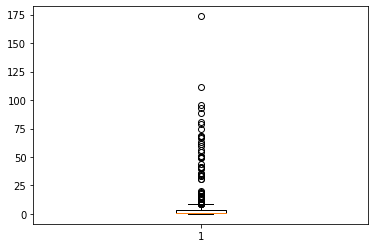

In [37]:
##Loss column
plt.boxplot(data.LOSS)
plt.show()

####Data Entry mistake
1. Outliers also missing values-->imputation
2. Winsorization-->Outliers are replaced with next small value
Example:[1,2,3,4,5,6,99,199, 9000]-->9000 as an  outlier-->9000 will be replace with 199
one analysis-->including outliers
one analysis--->drop all the outliers

In [38]:
data.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [39]:
#iloc-row indices, column indices
data.iloc[:,1:]#indices of the columns which we need to access

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...
1335,0.0,1.0,0.0,10.0,0.576
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [40]:
#split the data
X = data.iloc[:,1:]
y = data.ATTORNEY

In [41]:
#split the data into training and testing
#Built the model on training data and check the model performance
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [42]:
#Built the classifier on training data
#sklearn library:import , instantiate,fit
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
#Predicting on train data
#suntax:objectName.predict(input)
y_train_pred = reg.predict(X_train)
y_train_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [44]:
#confusion marix for training data
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_train,y_train_pred)
conf

array([[315, 170],
       [108, 345]])

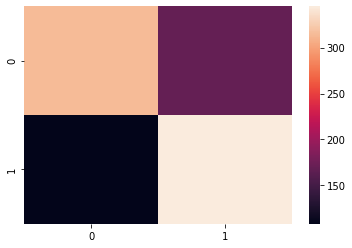

In [45]:
sns.heatmap(conf)

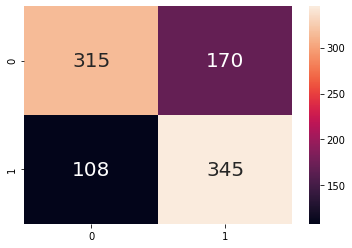

In [48]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='3.0f',annot_kws={'size':'20'})

In [49]:
##Accuracy--->TP+TN/TP+FP+TN+FN
# correct predictions/Total number of prediction
(315+345)/(315+170+108+345)

0.7036247334754797

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.7036247334754797

In [50]:
conf

array([[315, 170],
       [108, 345]])

In [52]:
print(conf[0][0])
print(conf[0][1])

315
170


In [54]:
print('True_Positives',conf[0][0])
print('fales_Positives',conf[0][1])
print('fales_negative', conf[1][0])
print('True_Positives', conf[1][1])

True_Positives 315
fales_Positives 170
fales_negative 108
True_Positives 345


In [56]:
true_positive=conf[0][0]
false_positive=conf[0][1]

In [57]:
##precision Rate
Precision = true_positive/(true_positive+false_positive)
Precision

0.6494845360824743

In [58]:
from sklearn.metrics import precision_score
precision_score(y_train,y_train_pred)

0.6699029126213593

In [59]:
Recall = true_positive/(true_positive+false_positive)
Recall

0.6494845360824743